# Overlaying Speed Traces of Two Drivers
---

In [1]:
import sys
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt

sys.path.append("../..")
from common import Config

In [3]:
fastf1.plotting.setup_mpl()
fastf1.Cache.enable_cache(Config.FASTF1_CACHE_DIR)

## Loading Drivers Data

In [8]:
session = fastf1.get_session(2023, 'Saudi Arabia', 'Q')
session.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.3.1]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetchi

In [9]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()

In [10]:
# Loading telemetry data
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

In [12]:
ham_tel

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2023-03-18 17:50:56.629,11173,303,8,100,False,12,car,0 days 00:00:00.086000,0 days 01:05:56.525000,7.238333
1,2023-03-18 17:50:57.109,11266,307,8,100,False,12,car,0 days 00:00:00.566000,0 days 01:05:57.005000,48.171667
2,2023-03-18 17:50:57.549,11317,309,8,100,False,12,car,0 days 00:00:01.006000,0 days 01:05:57.445000,85.938333
3,2023-03-18 17:50:57.869,11413,311,8,100,False,12,car,0 days 00:00:01.326000,0 days 01:05:57.765000,113.582778
4,2023-03-18 17:50:58.069,11413,311,8,100,False,12,car,0 days 00:00:01.526000,0 days 01:05:57.965000,130.860556
...,...,...,...,...,...,...,...,...,...,...,...
316,2023-03-18 17:52:24.630,10947,293,8,100,False,12,car,0 days 00:01:28.087000,0 days 01:07:24.526000,6014.380000
317,2023-03-18 17:52:24.790,10875,295,8,100,False,12,car,0 days 00:01:28.247000,0 days 01:07:24.686000,6027.491111
318,2023-03-18 17:52:25.070,10872,296,8,100,False,12,car,0 days 00:01:28.527000,0 days 01:07:24.966000,6050.513333
319,2023-03-18 17:52:25.430,10925,297,8,100,False,12,car,0 days 00:01:28.887000,0 days 01:07:25.326000,6080.213333


## Plotting Drivers

In [13]:
# Getting colours for plotting
rbr_colour = fastf1.plotting.team_color('RBR')
mer_colour = fastf1.plotting.team_color('MER')

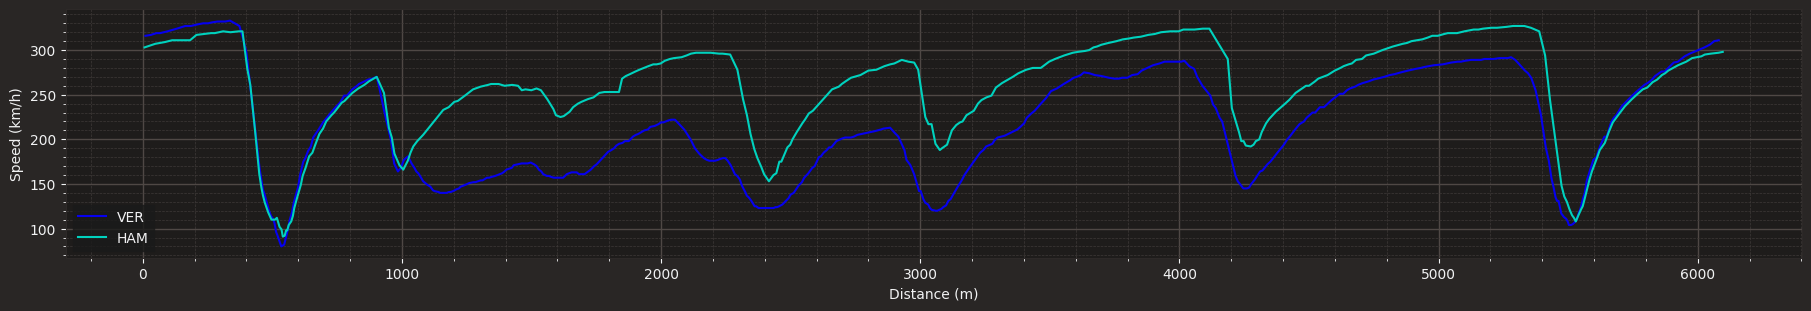

In [14]:
fig, ax = plt.subplots(figsize=(18, 3), constrained_layout=True)
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_colour, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_colour, label='HAM')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Speed (km/h)')
ax.legend()